In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [2]:
df_train=pd.read_csv('train.csv')
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
df_test=pd.read_csv('test.csv')

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
df=df_train.drop(['location','keyword','id'],axis=1)
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


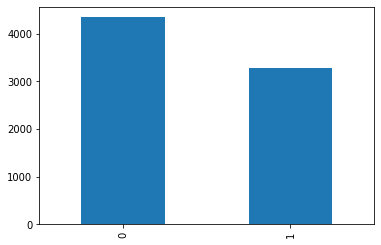

In [6]:
graph=pd.value_counts(df['target']).plot.bar()
graph

In [7]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

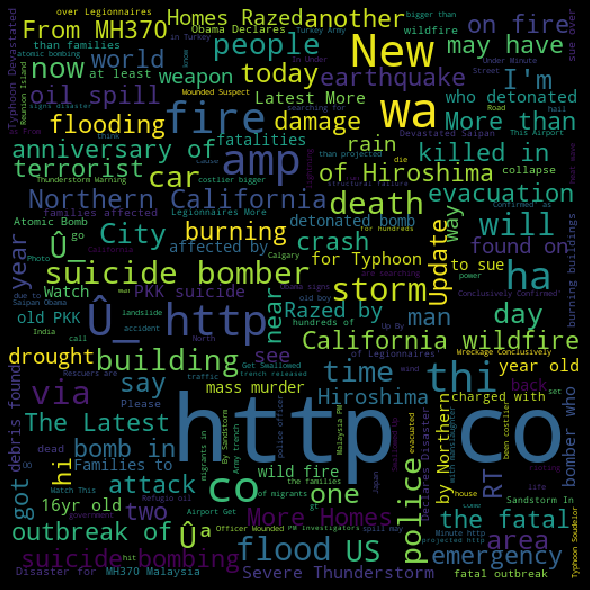

In [8]:
dis_words=' '.join(list(df[df['target']==1]['text']))
dis= WordCloud(width=512,height=512).generate(dis_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(dis)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [9]:
import nltk
from textblob import TextBlob
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
import string
import re
def preprocessing(txt):
    txt= re.sub(r"http\S+", "", txt)
    txt= re.sub('@[^\s]+','',txt)
    #### stemming
#     stemmer = nltk.PorterStemmer()
#     txt=[stemmer.stem(word) for word in txt.split()]
#     txt=" ".join(str(v) for v in txt)
    #### lemmtization    
#     docs = nlp(txt)
#     txt=[token.lemma_ for token in docs] 
#     txt=" ".join(str(v) for v in txt)
    ######
    p = string.digits + string.punctuation
    table = str.maketrans(p, len(p)*" ")
    txt = txt.translate(table)
    txt = txt.lower()
    return txt

No difference in result but stemming is much faster

In [10]:

for index, row in df.iterrows():
    df.at[index,'text'] = remove_emoji(row['text'])
    df.at[index,'text']=preprocessing(row['text'])

In [11]:
df

,text,target
0,our deeds are the reason of this earthquake m...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are ...,1
3,people receive wildfires evacuation or...,1
4,just got sent this photo from ruby alaska as ...,1
...,...,...
7608,two giant cranes holding a bridge collapse int...,1
7609,the out of control wild fires in california ...,1
7610,m utc km s of volcano hawaii,1
7611,police investigating after an e bike collided ...,1


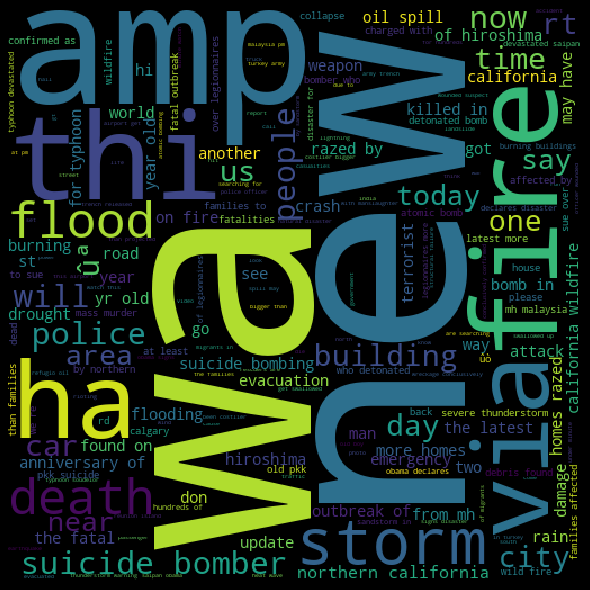

In [12]:
dis_words=' '.join(list(df[df['target']==1]['text']))
dis= WordCloud(width=512,height=512).generate(dis_words)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(dis)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [13]:

stradsc = 'This is a tweet with a url: https://t.co/0DlGChTBIx aksjxnjsalax'
stradsc = re.sub(r"http\S+", "", stradsc)
stradsc

'This is a tweet with a url:  aksjxnjsalax'

In [14]:
Tweet = "Hello@username lkasnxlaks"
Tweet = re.sub('@[^\s]+','',Tweet)
Tweet

'Hello lkasnxlaks'

In [15]:
countvectorizer = CountVectorizer(stop_words = 'english', min_df = 2)
countvectorizer.fit(df['text'])
countvetor = countvectorizer.transform(df['text'])


In [16]:
import sklearn.feature_extraction.text as txt

Hashvectorizer = txt.HashingVectorizer(stop_words='english', binary=False, norm=None,alternate_sign=False)
Hashvectorizer.fit(df_train['text'])
Hashvetor = Hashvectorizer.transform(df['text'])

In [17]:
Tfidfvectorizer = TfidfVectorizer(stop_words = 'english', min_df = 2)
Tfidfvectorizer.fit(df['text'])
Tfidfvetor = Tfidfvectorizer.transform(df['text'])

In [18]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
a_space=[0.1, 0.2, 0.3, 0.4,0.5,0.6,0.7,0.8,0.9,1,10,25,50,56,70,100]
param_grid = {'alpha': a_space}
MNBclf = MultinomialNB()
MNBccc= GridSearchCV(MNBclf, param_grid, cv=5)
MNBccc.fit(Hashvetor,df['target'])

GridSearchCV(cv=5, error_score=nan,
             estimator=MultinomialNB(alpha=1.0, class_prior=None,
                                     fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 10, 25, 50, 56, 70, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [19]:
print("Tuned Multinomial Parameters: {}".format(MNBccc.best_params_)) 
print("Best score is {}".format(MNBccc.best_score_))

Tuned Multinomial Parameters: {'alpha': 25}
Best score is 0.7177293760240482


In [20]:
from sklearn.model_selection import train_test_split
X_trains, X_tests, y_trains, y_tests = train_test_split(countvetor,df['target'], random_state=999)

In [21]:
from sklearn.naive_bayes import MultinomialNB
MNBclf = MultinomialNB()
MNBclf.fit(X_trains,y_trains)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
MNBclf.score(X_trains,y_trains)

0.8747591522157996

In [23]:
MNBclf.score(X_tests,y_tests)

0.7935924369747899

In [24]:
from sklearn.naive_bayes import BernoulliNB
a_space=[0.9,1,2,3,3.5,4.5,4,5,10]
param_grid = {'alpha': a_space}
NBclf = BernoulliNB()
NBccc= GridSearchCV(NBclf, param_grid, cv=5)
NBccc.fit(countvetor,df['target'])

GridSearchCV(cv=5, error_score=nan,
             estimator=BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None,
                                   fit_prior=True),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.9, 1, 2, 3, 3.5, 4.5, 4, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
print("Tuned Bernoulli Parameters: {}".format(NBccc.best_params_)) 
print("Best score is {}".format(NBccc.best_score_))

Tuned Bernoulli Parameters: {'alpha': 2}
Best score is 0.7323079405316466


In [26]:
NBclf = BernoulliNB(alpha=3)
NBclf.fit(X_trains,y_trains)

BernoulliNB(alpha=3, binarize=0.0, class_prior=None, fit_prior=True)

In [27]:
NBclf.score(X_trains,y_trains)

0.8330705902960238

In [28]:
NBclf.score(X_tests,y_tests)

0.7914915966386554

In [29]:
from sklearn.linear_model import LogisticRegression
c_space=[0.01,0.1,1,10,100,1000]
param_grid = {'C': c_space}
reg = LogisticRegression(max_iter=1000)
regccc= GridSearchCV(reg, param_grid, cv=5)
regccc.fit(countvetor,df['target'])

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [30]:
print("Tuned LogisticRegression: {}".format(regccc.best_params_)) 
print("Best score is {}".format(regccc.best_score_))

Tuned LogisticRegression: {'C': 0.1}
Best score is 0.698682315748967


In [31]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(max_iter=1000,C=1)
reg.fit(X_trains,y_trains)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
reg.score(X_trains,y_trains)

0.9273077596777018

In [33]:
reg.score(X_tests,y_tests)

0.7909663865546218

In [34]:
y_pred=reg.predict(X_tests)

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_tests, y_pred)

array([[923, 139],
       [259, 583]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_tests, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82      1062
           1       0.81      0.69      0.75       842

    accuracy                           0.79      1904
   macro avg       0.79      0.78      0.78      1904
weighted avg       0.79      0.79      0.79      1904



In [37]:
from sklearn.svm import SVC
SVClassifier = SVC()
SVClassifier.fit(X_trains,y_trains)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
SVClassifier.score(X_trains,y_trains)

0.932212296374146

In [39]:
SVClassifier.score(X_tests,y_tests)

0.7977941176470589

In [40]:
pre=pd.DataFrame(y_pred)
pre

,0
0,0
1,1
2,0
3,0
4,0
...,...
1899,1
1900,0
1901,0
1902,1


In [41]:
y_tests

3121    0
7041    1
2220    1
2616    0
7377    0
       ..
4030    1
4424    0
1458    1
4556    1
6536    0
Name: target, Length: 1904, dtype: int64

In [42]:
preda=pd.DataFrame(X_tests)
preda

,0
0,"(0, 1414)\t1\n (0, 1484)\t1\n (0, 1635)\t1..."
1,"(0, 1307)\t1\n (0, 1309)\t1\n (0, 1398)\t1..."
2,"(0, 431)\t1\n (0, 746)\t1\n (0, 1331)\t1\n..."
3,"(0, 1017)\t1\n (0, 1107)\t1\n (0, 1387)\t1..."
4,"(0, 862)\t1\n (0, 1032)\t1\n (0, 2633)\t1\..."
...,...
1899,"(0, 524)\t1\n (0, 1667)\t1\n (0, 2023)\t1\..."
1900,"(0, 414)\t1\n (0, 908)\t1\n (0, 1282)\t1\n..."
1901,"(0, 132)\t1\n (0, 807)\t1\n (0, 1557)\t1\n..."
1902,"(0, 301)\t2\n (0, 302)\t1\n (0, 2609)\t1\n..."
